In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
img = cv2.imread('./test_images/sharapova-84bc97653a7b49b73fcb4919fec16a31aff3b806-s1100-c50.jpg')
img.shape

(825, 1100, 3)

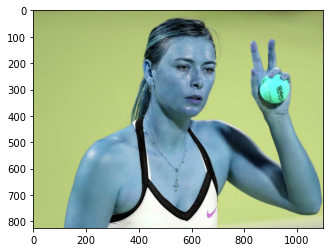

In [3]:
plt.imshow(img);

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(825, 1100)

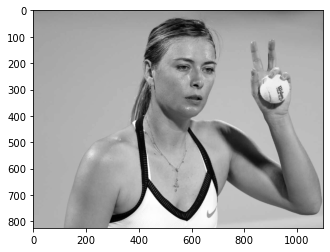

In [5]:
plt.imshow(gray,cmap = 'gray');

In [6]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[486, 112, 276, 276]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(486, 112, 276, 276)

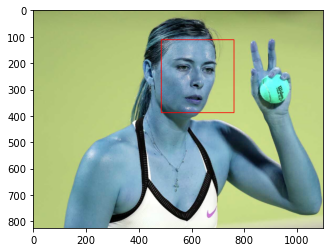

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img);

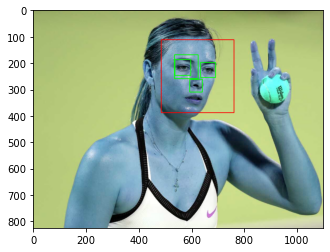

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

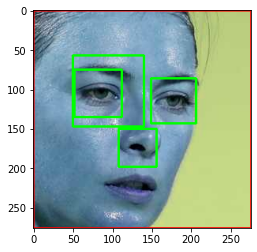

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray');

In [11]:
cropped_img = np.array(roi_color)
cropped_img.shape

(276, 276, 3)

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = face_img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
             return roi_color

In [13]:
path_to_data = 'C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/'
path_to_cr_data = 'C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/cropped/'

In [14]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [15]:
img_dirs

['C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/Anil_Kumble',
 'C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/Maria_Sharapova',
 'C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/Mithali_Raj',
 'C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/Sachin_Tendulkar',
 'C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/Smriti_Mandhana']

In [16]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data_)
os.mkdir(path_to_cr_data)    

In [17]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped images in folder :',cropped_folder)
            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count +=1

Anil_Kumble
Generating cropped images in folder : C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/cropped/Anil_Kumble
Maria_Sharapova
Generating cropped images in folder : C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/cropped/Maria_Sharapova
Mithali_Raj
Generating cropped images in folder : C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/cropped/Mithali_Raj
Sachin_Tendulkar
Generating cropped images in folder : C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/cropped/Sachin_Tendulkar
Smriti_Mandhana
Generating cropped images in folder : C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/cropped/Smriti_Mandhana


In [18]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Anil_Kumble': ['C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/cropped/Anil_Kumble\\Anil_Kumble10.png',
  'C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/cropped/Anil_Kumble\\Anil_Kumble11.png',
  'C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/cropped/Anil_Kumble\\Anil_Kumble12.png',
  'C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/cropped/Anil_Kumble\\Anil_Kumble13.png',
  'C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/cropped/Anil_Kumble\\Anil_Kumble14.png',
  'C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/cropped/Anil_Kumble\\Anil_Kumble16.png',
  'C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/cropped/Anil_Kumble\\Anil_Kumble17.png',
  'C:/Users/Admin/Desktop/ML_Projects/Sports Celebrity Image Classifier/Model/Dataset/cropped/An

In [20]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

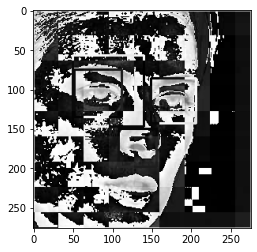

In [21]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [22]:
# celebrity_file_names_dict

In [23]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict    

{'Anil_Kumble': 0,
 'Maria_Sharapova': 1,
 'Mithali_Raj': 2,
 'Sachin_Tendulkar': 3,
 'Smriti_Mandhana': 4}

In [25]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
             continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [26]:
len(X[0])

4096

In [27]:
X[0]

array([[105],
       [116],
       [136],
       ...,
       [ 28],
       [ 34],
       [ 11]], dtype=uint8)

In [28]:
y[0]

0

In [29]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(196, 4096)

### Data cleaning process is done. Now we are ready to train our model

We will use SVM with rbf kernel tuned  with heuristic finetuning

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5918367346938775

In [32]:
import warnings
warnings.filterwarnings('always') 
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.70      0.78      0.74         9
           2       0.38      0.67      0.48         9
           3       0.67      0.57      0.62        14
           4       0.60      0.38      0.46         8

    accuracy                           0.59        49
   macro avg       0.64      0.59      0.59        49
weighted avg       0.64      0.59      0.60        49



In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [34]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [35]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.665517,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.413563,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.665977,{'logisticregression__C': 1}


In [36]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [37]:
best_estimators['svm'].score(X_test,y_test)

0.7755102040816326

In [38]:
best_estimators['random_forest'].score(X_test,y_test)

0.5306122448979592

In [39]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7346938775510204

In [40]:
best_clf = best_estimators['svm']

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  1,  1,  1],
       [ 1,  8,  0,  0,  0],
       [ 1,  0,  8,  0,  0],
       [ 1,  1,  1, 11,  0],
       [ 1,  1,  0,  1,  5]], dtype=int64)

Text(69.0, 0.5, 'Truth')

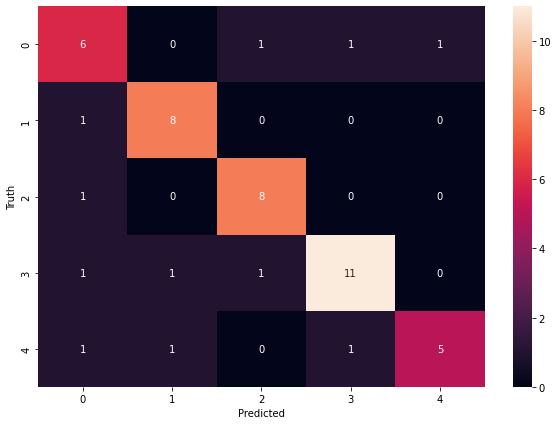

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
class_dict

{'Anil_Kumble': 0,
 'Maria_Sharapova': 1,
 'Mithali_Raj': 2,
 'Sachin_Tendulkar': 3,
 'Smriti_Mandhana': 4}

In [44]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

C:\Users\Admin\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)


['saved_model.pkl']

In [45]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))